# 사후분석

In [11]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
preds_valid = pd.read_csv('../valid_output.csv')
preds_valid = preds_valid[['text', 'target', 'pred']]
preds_valid

,text,target,pred
0,째 감도 어김없이 文 경제정책도 쟁점,6,6
1,방송 제작 현장 방문한 도종환 장관,2,2
2,수료증 수여하는 황창규 KT,2,2
3,바르사 주장 이니에스타와 평생 계약 체결,5,5
4,이라크 북부서 폭탄 테러로 터키군 2명 사망,4,4
...,...,...,...
2645,삼성전자 TF 분식회계 증거인멸 윗선 추적,1,1
2646,日관 방 미일안보조약 양국 의무의 균형 잡혀 있어,4,4
2647,바른 반시장적 추경 실패 예정돼 막아내겠다 종합,6,6
2648,사진 톡톡 중국인의 눈으로 본 한반도 정세 인물화,3,3


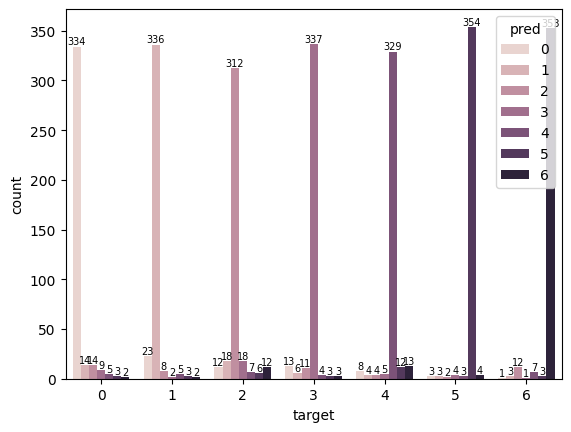

In [13]:
ax = sns.countplot(x='target', hue='pred', data=preds_valid)
for i in range(7):
    ax.bar_label(ax.containers[i], label_type='edge', size=7)

In [14]:
for i in range(7):
    print(f'{i} accuracy: {accuracy_score(preds_valid["target"] == i, preds_valid["pred"] == i)}')
    counts = [sum((preds_valid["target"]==i) & (preds_valid["pred"] == j)) for j in range(7)]
    total = len(preds_valid[preds_valid["target"] == i])
    for idx, count in enumerate(counts):
        print(f'{i} -> {idx} accuracy: {count*100/total}')
    print("------------------\n")

0 accuracy: 0.959622641509434
0 -> 0 accuracy: 87.66404199475066
0 -> 1 accuracy: 3.674540682414698
0 -> 2 accuracy: 3.674540682414698
0 -> 3 accuracy: 2.3622047244094486
0 -> 4 accuracy: 1.3123359580052494
0 -> 5 accuracy: 0.7874015748031497
0 -> 6 accuracy: 0.5249343832020997
------------------

1 accuracy: 0.9656603773584905
1 -> 0 accuracy: 6.068601583113456
1 -> 1 accuracy: 88.65435356200528
1 -> 2 accuracy: 2.1108179419525066
1 -> 3 accuracy: 0.5277044854881267
1 -> 4 accuracy: 1.3192612137203166
1 -> 5 accuracy: 0.7915567282321899
1 -> 6 accuracy: 0.5277044854881267
------------------

2 accuracy: 0.9532075471698114
2 -> 0 accuracy: 3.116883116883117
2 -> 1 accuracy: 4.675324675324675
2 -> 2 accuracy: 81.03896103896103
2 -> 3 accuracy: 4.675324675324675
2 -> 4 accuracy: 1.8181818181818181
2 -> 5 accuracy: 1.5584415584415585
2 -> 6 accuracy: 3.116883116883117
------------------

3 accuracy: 0.9701886792452831
3 -> 0 accuracy: 3.4482758620689653
3 -> 1 accuracy: 1.5915119363395225

In [15]:
# wrong prediction
wrong_pred = preds_valid[preds_valid['target'] != preds_valid['pred']]
wrong_pred['text']

24                               관광객 감소로 지난달 외국인 2
37                                 의 피신처인 베이 76 주택
43                            국립공원 탐방로 파노라마 이미지 제공
45                                  기계 플랫폼 군중 가 온다
51      2021 예산 저소득 구직자 1인당 300만 원 지원에 8천286억 원 투입
                           ...                    
2617                평양정상회담 백두산 장군봉에서 기념 을 하는 문 대통령
2622              미 중 대화 기류에 원달러환율 하락 한때 1 210원 하회
2625                  미래부 과학기술정보통신부 9년 만에 정보 표현 부활
2632                               방통위 변경 조사 수위 높여
2643                              참석자와 인사하는 안희정 지사
Name: text, Length: 295, dtype: object

In [49]:
# IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
label_dict = {0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}
#convert integer labels to string labels
wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)

/tmp/ipykernel_556797/669740416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
/tmp/ipykernel_556797/669740416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


In [28]:
# count pair of target and pred
wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']
pd.set_option('display.max_rows', 50)
wrong_pred

/tmp/ipykernel_556797/2573594692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']


,text,target,pred,pair
15,유튜브 영어 생방송에 자동 영문 자막 붙는다,생활문화,IT과학,생활문화-IT과학
16,강릉 출신 이순원이 사실에 가깝게 복원한 신사임당,사회,생활문화,사회-생활문화
23,평양정상회담 봉 촬영 하는 문 대통령,사회,정치,사회-정치
26,눈물 쏟은 문경은 선수 때 우승하고도 안 울었는데,IT과학,스포츠,IT과학-스포츠
29,평화로웠던 금요예배 총탄 세례 아비규환 속 공포의,사회,생활문화,사회-생활문화
...,...,...,...,...
4058,美 北 무수단 추정 미사일 오전 7시 발사 실패,정치,세계,정치-세계
4064,오스트리아 사상 첫 여성 총리 탄생 비라는 헌재 소장,생활문화,세계,생활문화-세계
4070,대통령 이탈리아 총리와 정상회담 공조 확대,정치,세계,정치-세계
4078,SW 학생 전문가가 알려주는 채용 정보 듣는다,사회,IT과학,사회-IT과학
